### Feature Engineering require based on the EDA:

1. remove column ->(id)
2. handle null values ->(bmi)
3. handle imbalance dataset
4. handle outliers
5. Encoding categorical values

In [8]:
%pwd

'c:\\Users\\44787\\Desktop\\projects\\End-To-End-MLOps-Project'

In [1]:
import os 

os.chdir("../")
!pwd

'pwd' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
from src.utils.common import read_yaml
from src.constants import PARAMS_FILE_PATH

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [9]:
## define csv file path

params_file = read_yaml(PARAMS_FILE_PATH)
dataset_path = params_file.data_load.dataset_path
dataset_path

[2024-05-22 19:47:54,842: INFO: common: yaml file: params.yaml loaded successfully]


'data/raw/healthcare-dataset-stroke-data.csv'

In [10]:
df = pd.read_csv(dataset_path)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [11]:
## remove id column

df.drop(["id"], inplace=True, axis=1)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [12]:
df.gender.value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [13]:
## remove other elements from gender column

i = df[df.gender == 'Other'].index
df = df.drop(i)

df.gender.value_counts()

gender
Female    2994
Male      2115
Name: count, dtype: int64

**handling null values**

In [14]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [15]:
df.bmi.nunique()

418

In [16]:
df.bmi.mean(), df.bmi.median()

(28.894559902200488, 28.1)

In [17]:
## fill null values with median (we select median cause of outliers)
df.fillna(df.bmi.median(), inplace=True)
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

**encoding categorical features**

In [18]:
## define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

## print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 6 numerical features : ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']

We have 5 categorical features : ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


In [19]:
print(df.gender.unique())
print(df.ever_married.unique())
print(df.work_type.unique())
print(df.Residence_type.unique())
print(df.smoking_status.unique())

['Male' 'Female']
['Yes' 'No']
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
['Urban' 'Rural']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [20]:
df['gender'].replace(to_replace={'Female':0,'Male':1}, inplace=True)
df['ever_married'].replace(to_replace={'No':0,'Yes':1}, inplace=True)
df['Residence_type'].replace(to_replace={'Rural':0,'Urban':1}, inplace=True)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,1
1,0,61.0,0,0,1,Self-employed,0,202.21,28.1,never smoked,1
2,1,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1
3,0,49.0,0,0,1,Private,1,171.23,34.4,smokes,1
4,0,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,1


In [21]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df['work_type'] = encoder.fit_transform(df['work_type'])
df['smoking_status'] = encoder.fit_transform(df['smoking_status'])

In [22]:
print(df.gender.unique())
print(df.ever_married.unique())
print(df.work_type.unique())
print(df.Residence_type.unique())
print(df.smoking_status.unique())

[1 0]
[1 0]
[2 3 0 4 1]
[1 0]
[1 2 3 0]


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5109 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   int64  
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   int64  
 5   work_type          5109 non-null   int32  
 6   Residence_type     5109 non-null   int64  
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                5109 non-null   float64
 9   smoking_status     5109 non-null   int32  
 10  stroke             5109 non-null   int64  
dtypes: float64(3), int32(2), int64(6)
memory usage: 439.1 KB


**handling imbalance dataset**

In [24]:
print(f'before over sampling:\n {df.stroke.value_counts()}')

before over sampling:
 stroke
0    4860
1     249
Name: count, dtype: int64


In [27]:
from imblearn.over_sampling import RandomOverSampler
os = RandomOverSampler()

X, y = os.fit_resample(df.drop(['stroke'], axis=1), df.stroke)

In [28]:
df = X
df['stroke'] = y
print(f'After over sampling:\n {df.stroke.value_counts()}')
df.head()

After over sampling:
 stroke
1    4860
0    4860
Name: count, dtype: int64


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,28.1,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1


**handling outliers**

<Axes: >

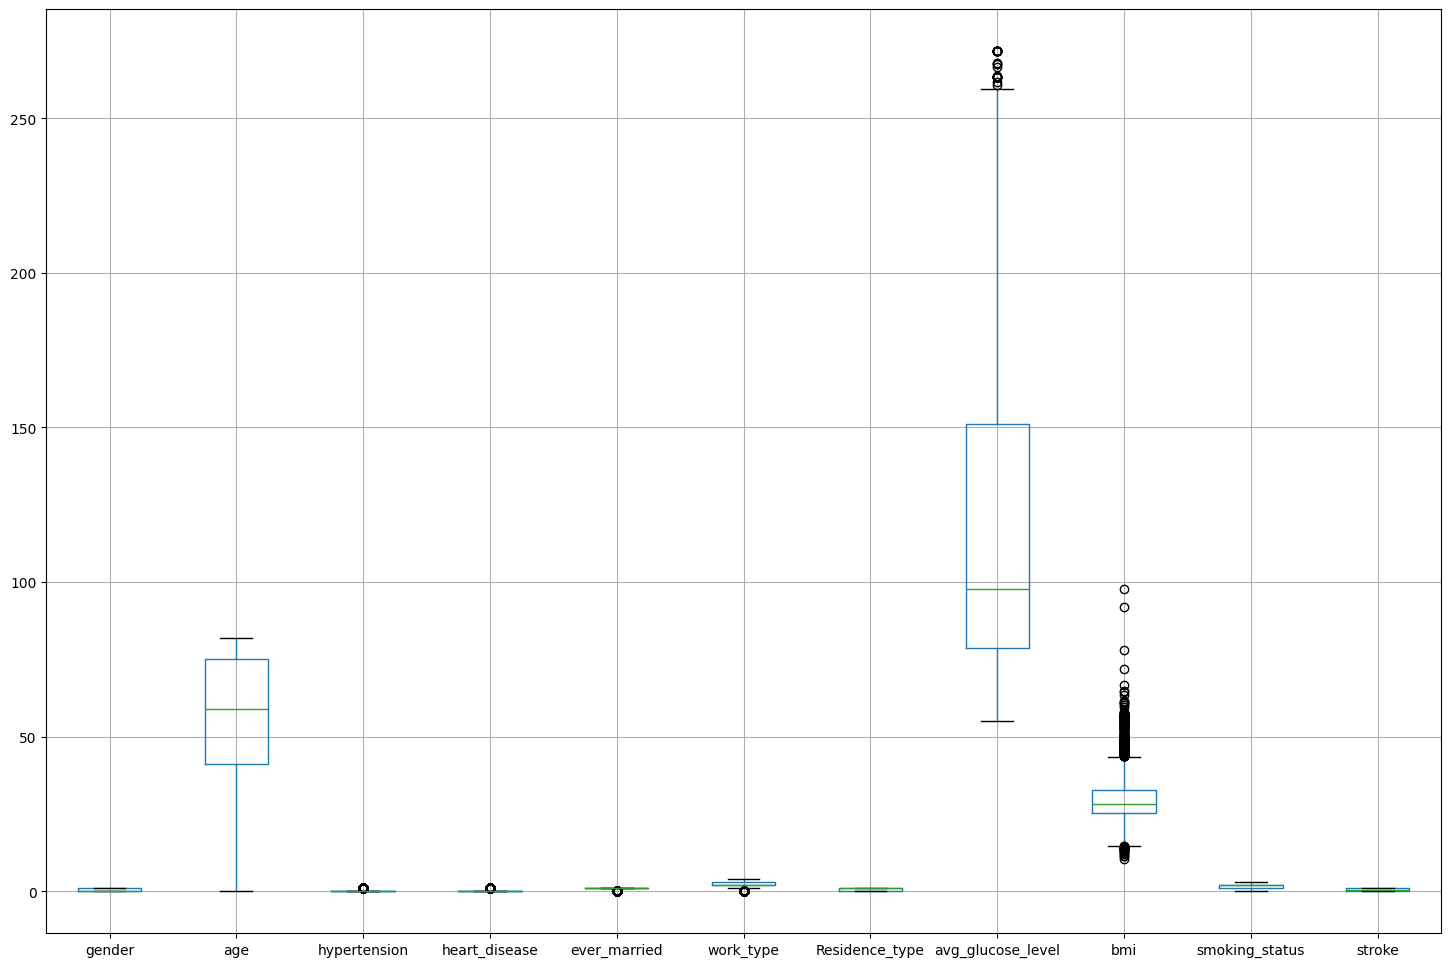

In [29]:
df.boxplot(figsize =(18,12))

In [33]:
import scipy.stats as stat
import pylab 

In [34]:
#### If you want to check whether feature is guassian or normal distributed
#### Q-Q plot
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

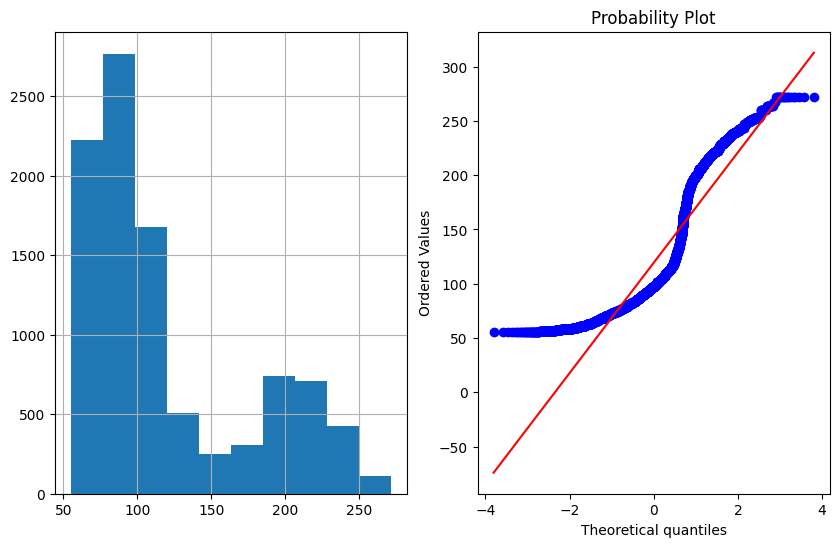

In [37]:
plot_data(df, 'avg_glucose_level')

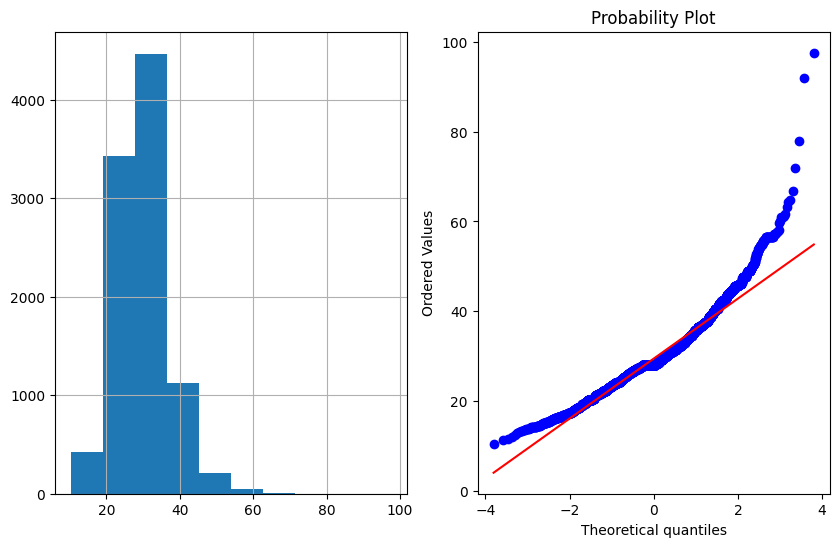

In [36]:
plot_data(df, 'bmi')

In [38]:
def Boundary_GD(feature, name):
    '''
    We use below method if follow a Gaussian Distribution
    
    ''' 

#     uppper_boundary=feature.mean() + 3* feature.std()
#     lower_boundary=feature.mean() - 3* feature.std()
    
    uppper_boundary=feature.mean() + feature.std()
    lower_boundary=feature.mean() - feature.std()
    print(name), print(lower_boundary), print(uppper_boundary),print(feature.mean())
    print(10*'-')

In [39]:
Boundary_GD(df.avg_glucose_level, "avg_glucose_level")
Boundary_GD(df.bmi, 'bmi')

avg_glucose_level
63.9521624351296
174.71122851137247
119.33169547325103
----------
bmi
22.557044072131205
36.28651559865069
29.421779835390947
----------


In [40]:
df.loc[df['avg_glucose_level']<=63.3, 'avg_glucose_level']=63.3
df.loc[df['avg_glucose_level']>=175, 'avg_glucose_level']=175

df.loc[df['bmi']<=22.5, 'bmi']=22.5
df.loc[df['bmi']>=36.5, 'bmi']=36.5

In [41]:
df.boxplot(column=["avg_glucose_level", "bmi"], figsize =(12,8));

**Working on distribution of the columns after handiling the outliers**

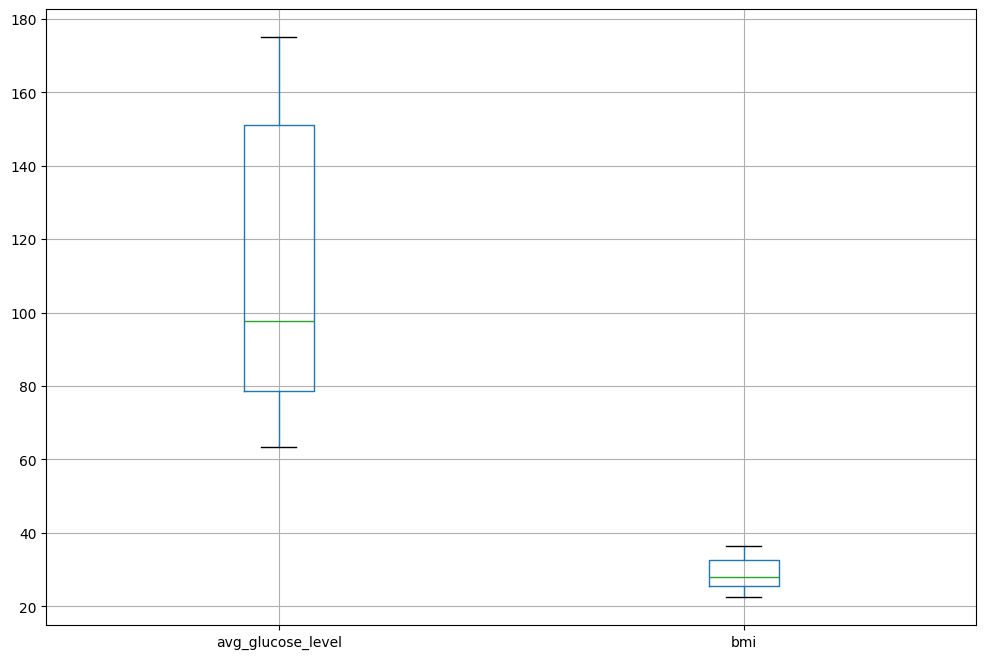

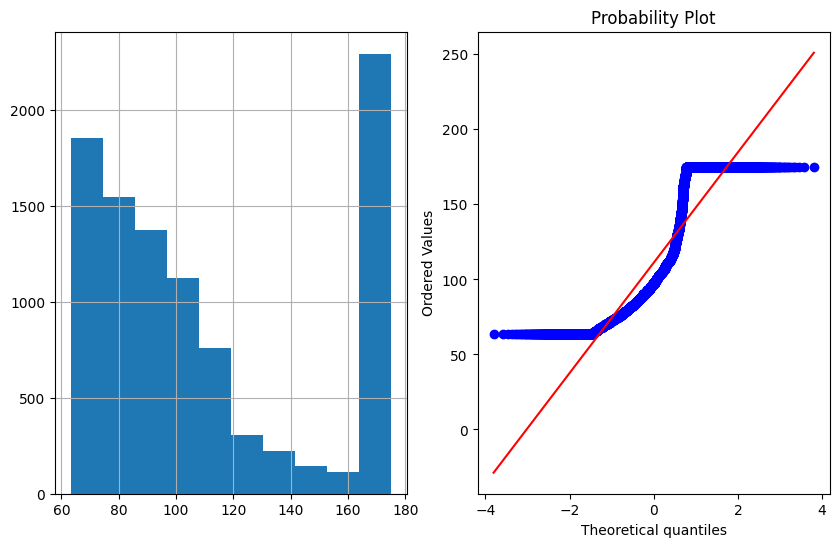

In [42]:
plot_data(df, 'avg_glucose_level')

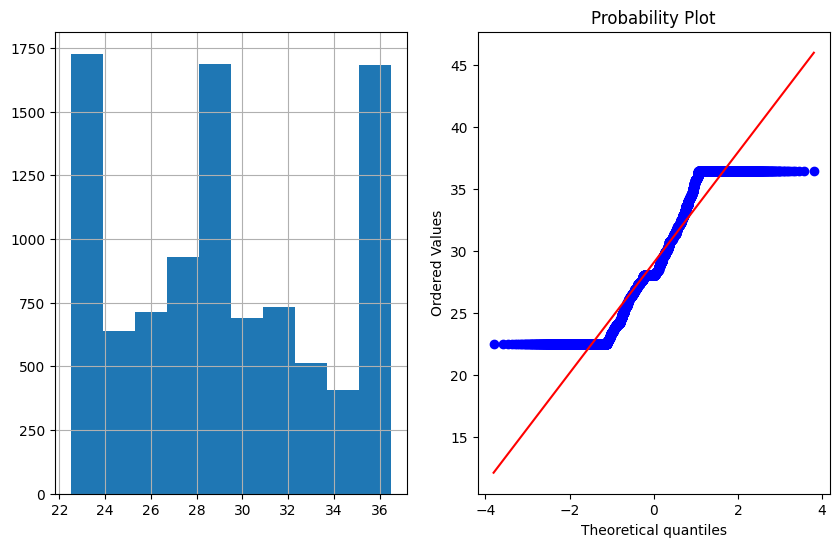

In [43]:
plot_data(df, 'bmi')

In [44]:
df.avg_glucose_level.std(), df.avg_glucose_level.mean()

(40.09664862505459, 111.11360596707819)

In [45]:
df.bmi.std(), df.bmi.mean()

(4.63700796698877, 29.05545267489712)

In [46]:
## Log normal transformation

df.avg_glucose_level = np.log(df.avg_glucose_level)
df.bmi = np.log(df.bmi)

In [47]:
df.avg_glucose_level.std(), df.avg_glucose_level.mean()

(0.348100838939254, 4.648574041346634)

In [48]:
df.bmi.std(), df.bmi.mean()

(0.15969436044976024, 3.356475757332478)

**Split the dataset to train and test**

In [49]:
## define csv file path
train_path = params_file.split_data.train_path
test_path = params_file.split_data.test_path
split_size = params_file.split_data.test_size

train_path, test_path, split_size

('data/processed/train_stroke.csv', 'data/processed/test_stroke.csv', 0.2)

In [50]:
from sklearn.model_selection import train_test_split

train ,test = train_test_split(df, test_size=split_size)

train.shape, test.shape

((7776, 11), (1944, 11))

In [51]:
## save the train and test to data/processed directory

train.to_csv(train_path, sep=",", index=False, encoding="utf-8")
test.to_csv(test_path, sep=",", index=False, encoding="utf-8")

In [52]:
train_df = pd.read_csv(train_path)
train_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,77.0,0,0,1,3,0,5.088460,3.484312,1,1
1,1,32.0,0,0,1,2,1,4.584457,3.597312,3,0
2,0,25.0,0,0,0,2,1,4.364244,3.597312,2,0
3,1,57.0,0,0,0,2,1,4.679721,3.346389,0,0
4,0,2.0,0,0,0,4,0,4.385770,3.113515,0,0
